# The codes below are from Networkx


### Create Laplacian construction functions for combinatorial and normalized laplacians.

1) Create a function takes in a graph object and returns a Laplacian matrix


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse

Step 1: Create a networkX Graph

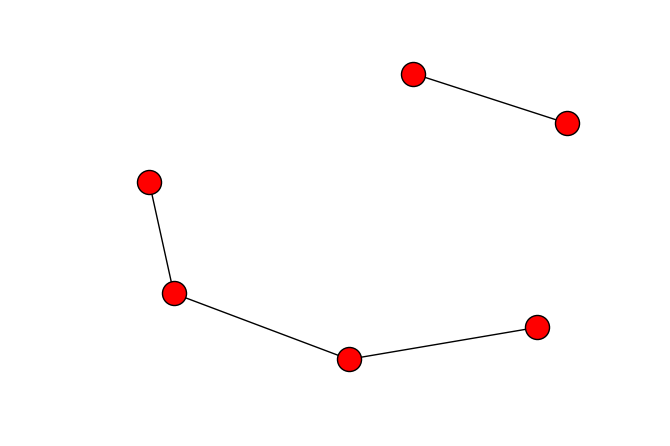

In [30]:
g = nx.Graph()
g.add_node(3)
g.add_node(6)
g.add_edge(4, 6)
g.add_edge(3, 1)
g.add_edges_from([(2, 5), (1, 4)])
nx.draw(g)
plt.show()

In [44]:
def laplacian_matrix(G,nodelist=None, weight='weight'):
    """
    create a laplacian matrix using a graph
    
    Argument: G, nodelist, weight
    
    Return: Scipy Sparse Matrix
    
    """
    if nodelist is None:
        nodelist = G.nodes()
    A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, weight=weight,
                                  format='csr')
    n,m = A.shape
    diags = A.sum(axis=1)
    D = scipy.sparse.spdiags(diags.flatten(), [0], m, n, format='csr')
    return  D - A

In [45]:
laplacian_matrix = laplacian_matrix(g,nodelist=None, weight='weight')

In [46]:
print laplacian_matrix

  (0, 0)	2
  (0, 2)	-1
  (0, 3)	-1
  (1, 1)	1
  (1, 4)	-1
  (2, 0)	-1
  (2, 2)	1
  (3, 0)	-1
  (3, 3)	2
  (3, 5)	-1
  (4, 1)	-1
  (4, 4)	1
  (5, 3)	-1
  (5, 5)	1


In [40]:
def normalized_laplacian_matrix(G, nodelist=None, weight='weight'):
    """
    create a normalized laplacian matrix using a graph
    
    Argument: G, nodelist, weight
    
    Return: Numpy Matrix
    
    """
    if nodelist is None:
        nodelist = G.nodes()
    A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, weight=weight,
                                  format='csr')
    n,m = A.shape
    diags = A.sum(axis=1).flatten()
    D = scipy.sparse.spdiags(diags, [0], m, n, format='csr')
    L = D - A
    with scipy.errstate(divide='ignore'):
       diags_sqrt = 1.0/scipy.sqrt(diags)
    diags_sqrt[scipy.isinf(diags_sqrt)] = 0
    DH = scipy.sparse.spdiags(diags_sqrt, [0], m, n, format='csr')
    return DH.dot(L.dot(DH))

In [42]:
normal_matrix = normalized_laplacian_matrix(g,nodelist=None, weight='weight')

In [43]:
print normal_matrix

  (0, 0)	1.0
  (0, 2)	-0.707106781187
  (0, 3)	-0.5
  (1, 1)	1.0
  (1, 4)	-1.0
  (2, 0)	-0.707106781187
  (2, 2)	1.0
  (3, 0)	-0.5
  (3, 3)	1.0
  (3, 5)	-0.707106781187
  (4, 1)	-1.0
  (4, 4)	1.0
  (5, 3)	-0.707106781187
  (5, 5)	1.0
